In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import pandas as pd
import numpy as np
import itertools
import zipfile
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#zf = zipfile.ZipFile('../data/fake_or_real_news.csv.zip') 
#newsDf = pd.read_csv(zf.open('fake_or_real_news.csv'),encoding='ISO-8859-1')
filename = "../data/fake_or_real_news.csv"
with open(filename,'rb') as f:
    lines = f.read()
new = str(lines,'utf-8')
with open('clear','w') as f2:
    f2.write(new)
newsDf = pd.read_csv("clear")
print("rows & lines: ", newsDf.shape)
newsDf.info()

rows & lines:  (6335, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.0+ KB


In [3]:
newsDf.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#newsDf = newsDf.set_index('Unnamed: 0')
#newsDf.head()

In [5]:
newsDf.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [6]:
# import random
# import string
# import re
# import gensim
# from gensim import corpora,models
# import nltk
# from nltk import word_tokenize
# from nltk.corpus import stopwords
# from nltk.tokenize import RegexpTokenizer
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from tqdm import tqdm
# tqdm.pandas(desc='progress-bar')

# ## Preprocess the data - lowercase, Tokenize, Remove stop words and punctuation, Remove words with fewer than 2 characters, stemming
# stop = set(stopwords.words('english')+ list(string.punctuation))
# stemmer = PorterStemmer()
# re_punct = re.compile('[' + ''.join(string.punctuation) + ']')

# def preprocess(text):
#     try:
#         tokens = tokenizer.tokenize(str(text).lower())
#         tokens = [t for t in tokens if not t in stop]
#         tokens = [re.sub(re_punct, '', t) for t in tokens]
#         tokens = [t for t in tokens if len(t) > 2]
#         tokens = [stemmer.stem(t) for t in tokens]
#         if len(tokens) == 0:
#             return None
#         else:
#             return ' '.join(tokens)
#     except:
#         print('Error!')
#         return None

# newsDf['tokens'] = newsDf['text'].progress_map(preprocess)
# newsDf = newsDf[newsDf['tokens'].notnull()]
# newsDf.reset_index(inplace=True)
# newsDf.drop('index', inplace=True, axis=1)

In [7]:
# print('{} text'.format(len(newsDf)))
# newsDf.head()

In [8]:
# Transform the test set 
#tfidf_test_tokens = tfidf_vectorizer.transform(newsDf.tokens)

# Extract the Data
y = newsDf.label
newsDf = newsDf.drop('label', axis=1)
xTrain, xTest, yTrain, yTest = train_test_split(newsDf['text'], y, test_size=0.30, random_state=123) 

In [17]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.porter import PorterStemmer
import string

stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(str(text).lower()) #nltk.word_tokenize(text)
    tokens = [i for i in tokens if i not in string.punctuation]
    stems = stem_tokens(tokens, stemmer)
    return stems

# Build Vectorizer Classifiers
countVectorizer = CountVectorizer(tokenizer=tokenize, lowercase=True, stop_words='english')
countTrain = countVectorizer.fit_transform(xTrain)
countTest = countVectorizer.transform(xTest)

# Build TF-IDF
tfidfVectorizer = TfidfVectorizer(tokenizer=tokenize, lowercase=True, stop_words='english', max_df=0.7)
tfidfTrain = tfidfVectorizer.fit_transform(xTrain)
tfidfTest = tfidfVectorizer.transform(xTest)

In [18]:
tfidfVectorizer.get_feature_names()[-10:]

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', '⅔']

In [19]:
countVectorizer.get_feature_names()[:10]

['0',
 '00',
 '000',
 '0000',
 '000000031',
 '00000031',
 '000035',
 '00006',
 '0001',
 '000billion']

In [20]:
countDf = pd.DataFrame(countTrain.A, columns=countVectorizer.get_feature_names())
tfidfDf = pd.DataFrame(tfidfTrain.A, columns=tfidfVectorizer.get_feature_names())
difference = set(countDf.columns) - set(tfidfDf.columns)
difference

{'ha', 's', 'thi', 'wa'}

In [21]:
print(countDf.equals(tfidfDf))

False


In [22]:
countDf.head()

,0,00,000,0000,000000031,00000031,000035,00006,0001,000billion,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,⅔
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
tfidfDf.head()

,0,00,000,0000,000000031,00000031,000035,00006,0001,000billion,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,⅔
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# compare the models
# normalize=True for normalization
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Greens):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

NB CV
accuracy: 0.884
Confusion matrix, without normalization


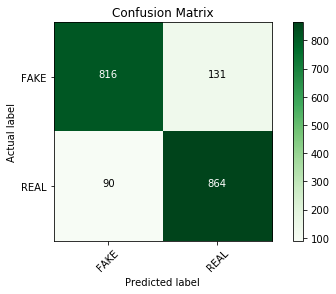

In [25]:
clf = MultinomialNB()
clf.fit(countTrain, yTrain)
pred = clf.predict(countTest)
score = metrics.accuracy_score(yTest, pred)
print("NB CV")
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(yTest, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

NB TF-IDF
accuracy: 0.835
Confusion matrix, without normalization


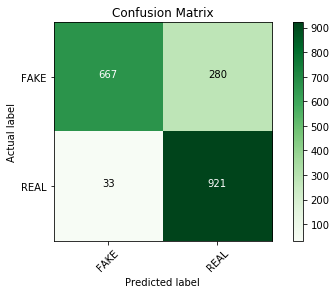

In [26]:
clf = MultinomialNB()
clf.fit(tfidfTrain, yTrain)
pred = clf.predict(tfidfTest)
score = metrics.accuracy_score(yTest, pred)
print("NB TF-IDF")
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(yTest, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Random Forest TF-IDF
accuracy: 0.836
Confusion matrix, without normalization


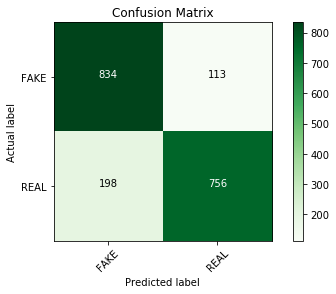

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2)
clf.fit(tfidfTrain, yTrain)
pred = clf.predict(tfidfTest)
score = metrics.accuracy_score(yTest, pred)
print("Random Forest TF-IDF")
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(yTest, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Random Forest CV
accuracy: 0.831
Confusion matrix, without normalization


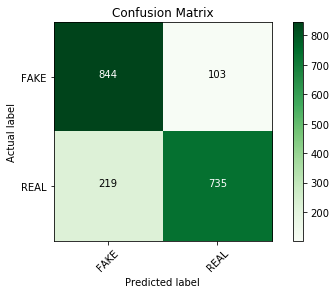

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2)
clf.fit(countTrain, yTrain)
pred = clf.predict(countTest)
score = metrics.accuracy_score(yTest, pred)
print("Random Forest CV")
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(yTest, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

SVM TF-IDF
accuracy: 0.927
Confusion matrix, without normalization


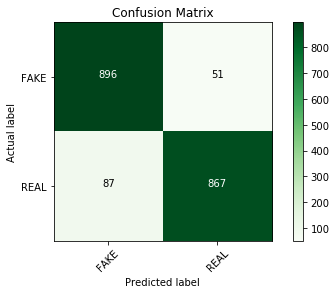

In [29]:
import sklearn.svm
clf = sklearn.svm.LinearSVC().fit(tfidfTrain,yTrain)
pred = clf.predict(tfidfTest)
score = metrics.accuracy_score(yTest, pred)
print("SVM TF-IDF")
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(yTest, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

SVM CV
accuracy: 0.874
Confusion matrix, without normalization


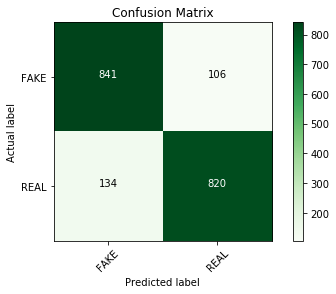

In [30]:
import sklearn.svm
clf = sklearn.svm.LinearSVC().fit(countTrain,yTrain)
pred = clf.predict(countTest)
score = metrics.accuracy_score(yTest, pred)
print("SVM CV")
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(yTest, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logistic_classifier = logreg.fit(tfidfTrain,yTrain)
pred = logistic_classifier.predict(tfidfTest)
score = metrics.accuracy_score(yTest, pred)
print("Regression TF-IDF")
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(yTest, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logistic_classifier = logreg.fit(countTrain,yTrain)
pred = logistic_classifier.predict(countTest)
score = metrics.accuracy_score(yTest, pred)
print("Regression CV")
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(yTest, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])